## Daisy feature

In [82]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import cv2
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [89]:
img_path = "../dataset/train/cropped_images/0106_cropped_fvert_1.jpg"
img_path = "../dataset/train/cropped_images/0672_cropped_forange_0.jpg"
my_image = cv2.imread(img_path)
standard_size = (64,64)
img = cv2.resize(my_image, standard_size)
#img = my_image


In [90]:
from skimage.feature import daisy
def compute_daisy_feature(image):
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    daisy_feature, daisy_image = daisy(
        img_gray,
        normalization="l2",
        visualize=True
    )
    return daisy_feature, daisy_image
daisy_feature, daisy_image = compute_daisy_feature(my_image)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(cv2.cvtColor(my_image, cv2.COLOR_BGR2RGB))
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(daisy_image, cmap="gray")
axes[1].set_title("DAISY Features")
axes[1].axis("off")

plt.show()

KeyboardInterrupt: 

## HOG Feature

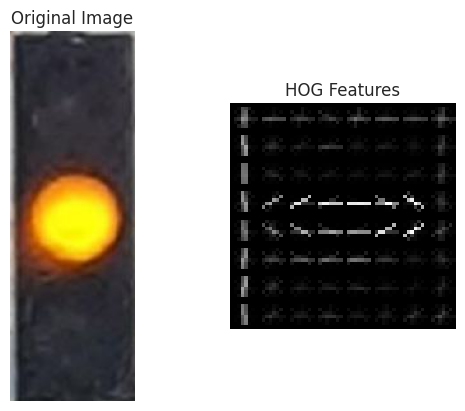

In [91]:
from skimage.feature import hog
def compute_hog_feature(image):
    # convert to grayscale
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    bins = 9
    cell_size = (8, 8)
    cpb = (2, 2)
    norm = "L2"
    hog_feature, hog_image = hog(
        image,
        orientations=bins,
        pixels_per_cell=cell_size,
        cells_per_block=cpb,
        block_norm=norm,
        transform_sqrt=True,
        visualize=True
    )
    return hog_feature, hog_image
hog_feature, hog_image = compute_hog_feature(img)

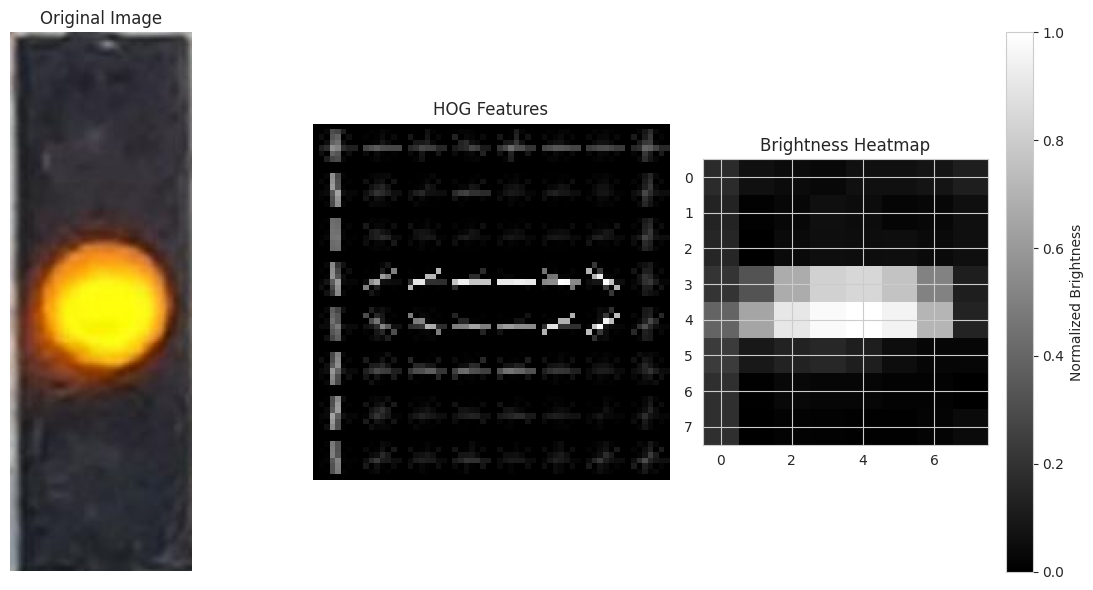

In [101]:
def compute_brightness(image, num_boxes_x, num_boxes_y):
    height, width, _ = image.shape
    box_height = height // num_boxes_y
    box_width = width // num_boxes_x

    brightness_matrix = np.zeros((num_boxes_y, num_boxes_x))

    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    brightness = hsv[:, :, 2]

    for i in range(num_boxes_y):
        for j in range(num_boxes_x):
            start_x = j * box_width
            end_x = (j + 1) * box_width if (j + 1) * box_width < width else width
            start_y = i * box_height
            end_y = (i + 1) * box_height if (i + 1) * box_height < height else height

            box_brightness = brightness[start_y:end_y, start_x:end_x]
            average_brightness = np.mean(box_brightness)
            brightness_matrix[i, j] = average_brightness

    max_brightness = np.max(brightness_matrix)
    min_brightness = np.min(brightness_matrix)
    if max_brightness != min_brightness:
        brightness_matrix = (brightness_matrix - min_brightness) / (max_brightness - min_brightness)
    else:
        brightness_matrix = np.zeros_like(brightness_matrix)

    return brightness_matrix



# Compute the brightness matrix
num_boxes_x = 8
num_boxes_y = 8
brightness_matrix = compute_brightness(my_image, num_boxes_x, num_boxes_y)

# Plotting the original image and brightness heatmap
fig, axes = plt.subplots(1, 3, figsize=(12, 6))

axes[0].imshow(cv2.cvtColor(my_image, cv2.COLOR_BGR2RGB))
axes[0].set_title("Original Image")
axes[0].axis("off")


axes[1].imshow(hog_image, cmap="gray")
axes[1].set_title("HOG Features")
axes[1].axis("off")

# Plot heatmap of brightness matrix
cax = axes[2].imshow(brightness_matrix, cmap='gray', interpolation='nearest')
axes[2].set_title("Brightness Heatmap")
fig.colorbar(cax, ax=axes[2], orientation='vertical', label='Normalized Brightness')

plt.tight_layout()
plt.show()  

